In [4]:
%pprint

import sys  
sys.path.insert(1, '..')
from aoc_utils import *
from bigtree import Node, list_to_tree, levelorder_iter

def isValid(np_shape: Tuple, index: Tuple)->bool:
    index = np.array(index)
    return (index >= 0).all() and (index < np_shape).all()

Pretty printing has been turned OFF


current_day is only available in December (EST)


### “i.e.” Latin "id est" => “that is.”  
### “e.g.” Latin "exempli gratia" => “for example.”

# Home

Each day's work will consist of three tasks:
- **Input**: Parse the day's input file with the function `parse(day, parser, sep)`, which treats the input as a sequence of *entries*, separated by `sep` (default newline); applies `parser` to each entry; and returns the results as a tuple. (Note: `ints` and `atoms` are useful `parser` functions (as are `int` and `str`).)
- **Part 1**: Write code to compute the answer to Part 1, and submit the answer to the AoC site. Use the function `answer` to record the correct answer and serve as a regression test when I re-run the notebook.
- **Part 2**: Repeat coding and `answer` for Part 2.

1. [Day 1](#day-1)
2. [Day 2](#day-2)
3. [Day 3](#day-3)
4. [Day 4](#day-4)
5. [Day 5](#day-5)
6. [Day 6](#day-6)
7. [Day 7](#day-7)
8. [Day 8](#day-8)
9. [Day 9](#day-9)
10. [Day 10](#day-10)
11. [Day 11](#day-11)
12. [Day 12](#day-12)
13. [Day 13](#day-13)
14. [Day 14](#day-14)
15. [Day 15](#day-15)


[home](#home)
# Day 1
[Historian Hysteria](https://adventofcode.com/2024/day/1)  
```
```

In [ ]:
get_in_file(1,2024)

In [ ]:
# in_part_A as tuple of 2-tuple 
in_part_A = Input(1, line_parser=ints)
# https://more-itertools.readthedocs.io/en/stable/api.html#more_itertools.collapse
# https://more-itertools.readthedocs.io/en/stable/api.html#more_itertools.partition
#is_odd = lambda x: x % 2 != 0
#left, right = partition(is_odd, collapse(in_part_A))
# https://more-itertools.readthedocs.io/en/stable/api.html#more_itertools.unzip
left, right = unzip(in_part_A)
dist = lambda x,y: abs(x-y)
res = sum(map(dist,sorted(list(left)),sorted(list(right))))
res

In [ ]:
submit(res, part="a", day=1, year=2024)

### Part 2


In [ ]:
left, right = unzip(in_part_A)
counter_right = Counter(right)
counter_right.most_common(3)

In [ ]:
func = lambda x: x*counter_right[x]
res_b = sum(map(func,left))
res_b

In [ ]:
submit(res_b, part="b", day=1, year=2024)

[home](#home)
# Day 2
[Red-Nosed Reports](https://adventofcode.com/2024/day/2)   

a report only counts as safe if both of the following are true:
- The levels are either *all increasing* or *all decreasing*.
- Any two adjacent levels differ by at *least one* and at *most three*.


In [ ]:
get_in_file(2,2024)

In [ ]:
in_part_A = Input(2, line_parser=ints)

In [ ]:
# all decreasing and any two adjacent levels differ by at least one and at most three
cond1 = lambda x,y: 1 if (x>y)and(abs(x-y)>0)and(abs(x-y)<4) else 0
# all increasing and any two adjacent levels differ by at least one and at most three
cond2 = lambda x,y: 1 if (x<y)and(abs(x-y)>0)and(abs(x-y)<4) else 0
set1=set([level for level in in_part_A if all([(cond1)(*pair) for pair in pairwise(level)])])
set2=set([level for level in in_part_A if all([(cond2)(*pair) for pair in pairwise(level)])])

In [ ]:
res_a = len(set1)+len(set2)
res_a

In [ ]:
submit(res_a, part="a", day=2, year=2024)

### Part 2

the same rules apply as before, except if removing a single level from an unsafe report would make it safe, the report instead counts as safe

In [ ]:
set_all=set([level for level in in_part_A])

In [ ]:
unsafe = set_all-set1-set2

In [ ]:
def tolerate_one_bad_level(lvl):
    for c in combinations(lvl,len(lvl)-1):
        if all([(cond1)(*pair) for pair in pairwise(c)]) :
            return True
        if all([(cond2)(*pair) for pair in pairwise(c)]) :
            return True
    return False    

set3=set([level for level in unsafe if tolerate_one_bad_level(level)])


In [ ]:
res_b = res_a+len(set3)
res_b

In [ ]:
submit(res_b, part="b", day=2, year=2024)

[home](#home)
# Day 3
[Mull It Over](https://adventofcode.com/2024/day/3)  

consider the following section of corrupted memory: 

x**mul(2,4)**%&mul[3,7]!@^do_not_**mul(5,5)**+mul(32,64]then(**mul(11,8)mul(8,5)**)  

Only the four highlighted sections are real mul instructions

In [ ]:
get_in_file(3,2024)
in_part_A = Input(3)

In [ ]:
regex = r'mul\((\d\d*\d*),(\d\d*\d*)\)'
res_a = sum([(lambda x,y:int(x)*int(y))(*pair) for pair in collapse([re.findall(regex, line) for line in in_part_A],base_type=tuple)])
res_a

In [ ]:
submit(res_a, part="a", day=3, year=2024)

### Part 2

In [ ]:
regex = r'mul\((\d\d*\d*),(\d\d*\d*)\)|(?P<ENA>do\(\))|(?P<DIS>don\'t\(\))'

In [ ]:
enable = True
res_b=0
# collapse is a generator ...
for mo in collapse([re.findall(regex, line) for line in in_part_A],base_type=tuple):
    x,y,ena,dis = mo
    if ena != '':
        enable = True
        continue
    if dis != '':
        enable = False
        continue
    if enable :
        res_b += int(x)*int(y)
        
res_b

In [ ]:
submit(res_b, part="b", day=3, year=2024)

[home](#home)
# Day 4
[Ceres Search](https://adventofcode.com/2024/day/4)  

This word (*XMAS*) search allows words to be horizontal, vertical, diagonal, written backwards, or even overlapping other words

In [ ]:
get_in_file(4,2024)

test_d4 = '''
MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX
'''

p = lambda x:tuple(x)
in_part_A = mapt(p,Input(4))
#in_part_A = mapt(p,test_d4.rstrip().split())
M = np.matrix(in_part_A)
shape = M.shape

In [ ]:
X_idx = (0,0)
M_idx = set(product((-1,0,1),repeat=2)) - {(0,0)}
A_idx = set(product((-2,0,2),repeat=2)) - {(0,0)}
S_idx = set(product((-3,0,3),repeat=2)) - {(0,0)}

___0d = {'M':( 1, 0),'A':( 2, 0),'S':( 3, 0)}
__45d = {'M':( 1, 1),'A':( 2, 2),'S':( 3, 3)}
__90d = {'M':( 0, 1),'A':( 0, 2),'S':( 0, 3)}
_135d = {'M':(-1, 1),'A':(-2, 2),'S':(-3, 3)}
_180d = {'M':(-1, 0),'A':(-2, 0),'S':(-3, 0)}
_225d = {'M':(-1,-1),'A':(-2,-2),'S':(-3,-3)}
_270d = {'M':( 0,-1),'A':( 0,-2),'S':( 0,-3)}
_315d = {'M':( 1,-1),'A':( 2,-2),'S':( 3,-3)}

dDeg = [___0d,__45d,__90d,_135d,_180d,_225d,_270d,_315d]


In [ ]:
res_a = 0
with np.nditer(M, flags=['multi_index']) as it :
    for x in it:
        #print("%s <%s>" % (x, it.multi_index), end=' ')
        if x != 'X' :
            # next matrix element
            continue
        for d in dDeg :
            for k,v in d.items() :
                ij = add_tuple(v,it.multi_index)
                if not isValid(shape,ij) or M[ij] != k :
                    # break, not found ... next d in dDeg
                    break
            # https://docs.python.org/3/tutorial/controlflow.html#else-clauses-on-loops
            # If the loop finishes without executing the break, the else clause executes
            else :
                # found !
                res_a +=1
res_a            

In [ ]:
submit(res_a, part="a", day=4, year=2024)

### Part 2  

*West* *North* *East* *South*
```
M S   M M   S M   S S
 A     A     A     A
M S   S S   S M   M M

M : (-1, 1)(-1,-1)
A : ( 1, 1)( 1,-1)

....
```


In [ ]:
# West --> M M 
W = {'M':((-1, 1),(-1,-1)),'S':(( 1, 1),( 1,-1))}
# North
N = {'M':((-1, 1),( 1, 1)),'S':(( 1,-1),(-1,-1))}
# East 
E = {'S':((-1, 1),(-1,-1)),'M':(( 1, 1),( 1,-1))}
# South
S = {'S':((-1, 1),( 1, 1)),'M':(( 1,-1),(-1,-1))}

wnes = [W,N,E,S]

In [ ]:
res_b = 0
idx_S = set()
valid_M = np.zeros(shape)
with np.nditer(M, flags=['multi_index']) as it :
    for x in it:
        #print("%s <%s>" % (x, it.multi_index), end=' ')
        if x != 'A' :
            # next matrix element
            continue
        for d in wnes :
            for k,vv in d.items() :
                v1,v2 = vv
                ij = add_tuple(v1,it.multi_index)
                if not isValid(shape,ij) or M[ij] != k :
                    # break, not found ... next d in wnes
                    break
                idx_S.add(ij)
                valid_M[ij] = 1
                ij = add_tuple(v2,it.multi_index)
                if not isValid(shape,ij) or M[ij] != k :
                    # break, not found ... next d in wnes
                    break
                idx_S.add(ij)
                valid_M[ij] = 1
                
            # https://docs.python.org/3/tutorial/controlflow.html#else-clauses-on-loops
            # If the loop finishes without executing the break, the else clause executes
            else :
                # found !
                res_b +=1
                # current matrix element
                valid_M[it.multi_index] = 1
res_b

In [ ]:
submit(res_b, part="b", day=4, year=2024)

In [ ]:
with np.nditer(M, flags=['multi_index']) as it :
    for x in it:
        if not valid_M[it.multi_index] :
            M[it.multi_index] = '.'
M

[home](#home)
# Day 5
[Print Queue](https://adventofcode.com/2024/day/5)  

Inupt file consists of 2 parts
- page ordering rules 
- pages to produce in each update

rule **47|53**, means that if an update includes both page number 47 and page number 53,  
then page number 47 must be printed at some point before page number 53  

75,**47**,61,**53**,29

**75** is correct due to rules 75|47, 75|61, 75|53, and 75|29

In [ ]:
get_in_file(5,2024)

In [ ]:
test_d5 = '''
47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47
'''

In [ ]:
p = lambda x: x.strip().split()
raw_rules,pages = parse(5, parser=p, sep="\n\n")
#raw_rules,pages = mapt(p, test_d5.split("\n\n"))
pages = mapt(lambda x: mapt(int,x),(mapt(lambda x: x.split(','),pages)))
rules = defaultdict(set)
for k,v in sliced(mapt(int,flatten(mapt(lambda x: x.split('|'),raw_rules))),2) :
    rules[k].add(v)


In [ ]:
valid_pages = []
invalid_pages = []
res_a = 0
for pg in pages :
    #print(pg)
    for i in range(len(pg)) :
        curr_pg = pg[i]
        rule = rules[pg[i]]
        pre_pg,post_pg = pg[:i],pg[i+1:]
        #print('{}:{} pre {} post {} {}'.format(curr_pg,rule,pre_pg,post_pg,rule.isdisjoint(set(pre_pg))))
        if not rule.isdisjoint(set(pre_pg)) :
            invalid_pages.append(pg)
            break
    else :
        valid_pages.append(pg)
        res_a += pg[math.floor(len(pg)/2)]
    #print()
res_a

In [ ]:
submit(res_a, part="a", day=5, year=2024)

### Part 2

In [ ]:
res_b = 0
for pg_inv in invalid_pages :
    print('invalid {}'.format(pg_inv))
    pg_inv_s = set(pg_inv)
    d = {k:(v.intersection(pg_inv_s)) for (k,v) in rules.items() if k in pg_inv}
    s = sorted(d.items(), key=lambda item: len(item[1]),reverse=True)
    #print(s)
    l = [t[0] for t in s]
    #print(l)
    res_b += l[math.floor(len(l)/2)]
res_b

In [ ]:
submit(res_b, part="b", day=5, year=2024)

[home](#home)
# Day 6
[Guard Gallivant](https://adventofcode.com/2024/day/6)  


Lab guards follow a patrol protocol which involves repeatedly following these steps:
- If there is something directly in front of you, turn right 90 degrees.
- Otherwise, take a step forward.


In [ ]:
get_in_file(6,2024)

In [ ]:
test_d6 = '''
....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...
'''

p = lambda x:tuple(x)
#in_part_A = mapt(p,Input(6))
in_part_A = mapt(p,test_d6.rstrip().split())
MpA = np.matrix(in_part_A)
MpA.shape, MpA.size

In [ ]:
# each ordered key turn right 90 degrees
guard_pos_d = OrderedDict({'^':(-1,0),'>':(0,1),'v':(1,0),'<':(0,-1)})
#Step = namedtuple('Step','dir,pos,turn,pred_step')
#Step = namedtuple('Step','dir,pos,turn')
# !!! https://docs.python.org/3.13/reference/datamodel.html#object.__hash__
# If a class that overrides __eq__() needs to retain the implementation of __hash__() from a parent class,
# the interpreter must be told this explicitly by setting __hash__ = <ParentClass>.__hash__.
class Step(namedtuple('Step',['dir','pos','turn'])):
    __hash__ = tuple.__hash__
    def __eq__(self,other)->bool:
        return self.dir==other.dir and self.pos==other.pos
        
#assert(Step('^',(0,1),False) == Step('^',(0,1),True))

In [ ]:
start_pos = Step('^',mapt(int,tuple(np.argwhere(MpA == '^')[0])),False)
start_pos

In [ ]:
def get_next_turn(t):
    try :
        l=list(guard_pos_d.keys())
        return l[l.index(t)+1]
    except IndexError :
        return l[0]

def get_next_step(s:Step,M)->Step:
    """ get next step : 
         - turn 90 degree if obstacle in front
        OR
         - move forward         
    """
    next_pos = add_tuple(s.pos,guard_pos_d[s.dir])
    if not isValid(M.shape,next_pos) :
            return None
    if M[next_pos] == '#' :
        # turn right 90 degrees 
        turn = get_next_turn(s.dir)
        return Step(turn,s.pos,True)
    else :
        # move forward
        return Step(s.dir,next_pos,False)

def get_steps(start:Step,M)->List[Step]:
    steps = list()
    steps.append(start)
    next_step = start
    while (next_step:= get_next_step(next_step,M)) :
        #print(next_step)
        if next_step in steps :
            steps.append(next_step)
            break
        steps.append(next_step)
    return steps

def is_loop_steps(steps:List[Step]):
    l = [(x.pos,x.dir)for x in steps]
    return last(l) in l[:-1] 

def get_path_from_steps(steps:List[Step])->List[Step]:
    return [x for x in steps if not x.turn]


In [ ]:
# distint position will the guard visit before leaving the mapped area    
res_a =  len(Counter([x.pos for x in get_steps(start_pos,MpA)]))
res_a

In [ ]:
submit(res_a, part="a", day=6, year=2024)

### Part 2

In [ ]:
test_x1 = '''
..#..
.#.#.
.#.#.
.#.#.
.#.#.
.#^#.
.....
'''
Mx1 = np.matrix(mapt(lambda x:tuple(x),test_x1.rstrip().split()))
Mx1.shape, Mx1.size
start_pos = Step('^',mapt(int,tuple(np.argwhere(Mx1 == '^')[0])),False)
print(start_pos)
steps = get_steps(start_pos,Mx1)
print(is_loop_steps(steps))
get_path_from_steps(steps)
Mx1[(6,2)]='#'
steps = get_steps(start_pos,Mx1)
print(is_loop_steps(steps))
get_path_from_steps(steps)
Mx1[(6,2)]='.'
steps


In [ ]:
p = lambda x:tuple(x)
in_part_A = mapt(p,Input(6))
#in_part_A = mapt(p,test_d6.rstrip().split())
MpA = np.matrix(in_part_A)
MpA.shape, MpA.size

def get_obstacle(M:np.matrix)->List[Step]:
    start = Step('^',mapt(int,tuple(np.argwhere(M == '^')[0])),False)
    obstacle = set()
    steps = get_steps(start,M)
    for p0,p1 in pairwise(get_path_from_steps(steps)) :
        #print(p0,p1)
        if M[p1.pos] == 'O':
            continue
        tmp = M[p1.pos]
        M[p1.pos] = '#'
        if is_loop_steps(ss:=get_steps(start,M)) :
            obstacle.add(p1)
            print('add {}'.format(p1))
            #print(obstacle)
            #print(ss)
        #M[p1.pos] = tmp
        M[p1.pos] = 'O'
        
    return obstacle

obstacles = get_obstacle(MpA)

# 35 mins

In [ ]:
res_b = len(Counter([x.pos for x in obstacles]))
res_b

In [ ]:
submit(res_b, part="b", day=6, year=2024)

In [ ]:
test_x2 = '''
.....
..#..
.#^#.
..#..
'''
Mx2 = np.matrix(mapt(lambda x:tuple(x),test_x2.rstrip().split()))
Mx2.shape, Mx2.size
start_pos = Step('^',mapt(int,tuple(np.argwhere(Mx2 == '^')[0])),False)
is_loop_steps(steps:=get_steps(start_pos,Mx2))
pp.pprint(steps)
get_path_from_steps(steps)

[home](#home)
# Day 7
[Bridge Repair](https://adventofcode.com/2024/day/7)  

Use [bigtree](https://bigtree.readthedocs.io/en/stable/) Python package

In [ ]:
get_in_file(7,2024)

In [ ]:
test_d7 = """
190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20
"""

In [ ]:
equations = mapt(lambda x:(int(x[0]),mapt(lambda x:int(x),x[1].strip().split())),(mapt(lambda x:x.split(':'),Input(7))))
#equations = mapt(lambda x:(int(x[0]),mapt(lambda x:int(x),x[1].strip().split())),(mapt(lambda x:x.split(':'),test_d7.strip().split("\n"))))
#equations

In [ ]:
debug = False

def make_tree_path(s ,root_name="R")->List:
    """ '++++' --> 'R/+/+/+/+' """
    return "".join(list(intersperse('/',root_name+s)))
    
def make_tree(op_num,operators:List):
    """  """
    prod_iter = product ("".join(operators),repeat=op_num)
    path_str = list(mapt(lambda x:"".join(x),prod_iter))
    if debug : print(path_str) 
    return list_to_tree([make_tree_path(x) for x in path_str])

def populate_tree(operands_list, operators_dict):
    """ """
    root = make_tree(len(operands_list)-1, operators_dict.keys())
    for node in levelorder_iter(root) :
        if node.is_root :
            node.set_attrs({"res": operands_list[0]})
        else :    
            node.set_attrs({"res": 0})
    #root.hshow()
    for node in levelorder_iter(root) :
        if not node.is_root :
            op = operators_dict[node.node_name]
            op1 = node.parent.get_attr("res")
            op2 = operands_list[node.depth-1]
            res = op(op1,op2)
            #print("{}{}{}".format(op1,node.node_name,op2))
            node.set_attrs({"res":res})
    return root

def all_res_equation(root):
    for node in levelorder_iter(root) :
        if node.is_leaf :
            yield node.get_attr("res")

if debug :
    root = populate_tree([81,40,27])
    root.show(attr_list=["res"])

operators = {"+":operator.add,"*":operator.mul}
true_equations_res = list()
for res,operands in equations :
    all_res = list(all_res_equation(populate_tree(operands,operators)))
    if debug : print(res,all_res)
    if res in all_res :
        true_equations_res.append(res)

true_equations_res
res_a = sum(true_equations_res)
res_a

In [ ]:
submit(res_a, part="a", day=7, year=2024)

### Part 2

add the concatenation operator (||) combines the digits from its left and right inputs into a single number.  
For example, **12 || 345** would become **12345**. All operators are still evaluated left-to-right.

In [ ]:
operators.update({"|": lambda x,y: int(str(x)+str(y))})
true_equations_res = list()
for res,operands in equations :
    all_res = list(all_res_equation(populate_tree(operands,operators)))
    if debug : print(res,all_res)
    if res in all_res :
        true_equations_res.append(res)

true_equations_res
res_b = sum(true_equations_res)
res_b

In [ ]:
submit(res_b, part="b", day=7, year=2024)

[home](#home)
# Day 8
[Resonant Collinearity](https://adventofcode.com/2024/day/8)  

How many unique locations within the bounds of the map contain an antinode ?  

Each antenna is tuned to a specific frequency indicated by a **single** *lowercase letter*, *uppercase letter*, or *digit*.  

An antinode occurs at any point that is perfectly in line with two antennas of the same frequency - but only when one of the antennas is twice as far away as the other.  

However, antinodes can occur at locations that contain antennas


In [ ]:
get_in_file(8,2024)

In [ ]:
test_d8_1 = """
..........
...#......
#.........
....a.....
........a.
.....a....
..#.......
......#...
..........
..........
"""

In [ ]:
test_d8_2 = """
......#....#
...#....0...
....#0....#.
..#....0....
....0....#..
.#....A.....
...#........
#......#....
........A...
.........A..
..........#.
..........#.
"""

In [ ]:
test_d8_3 = """
#.........
..#.a.a.#.
..........
a.........
..........
..........
a.........
..........
..........
#....#aa#.
"""

In [ ]:
p = lambda x:tuple(x)
in_part_A = mapt(p,Input(8))
#in_part_A = mapt(p,test_d8_1.rstrip().split())
#in_part_A = mapt(p,test_d8_2.rstrip().split())
#in_part_A = mapt(p,test_d8_3.rstrip().split())
MpA = np.matrix(in_part_A)
MpA.shape, MpA.size

In [ ]:
def isChrValid(c:str)->bool:
    return len(c) == 1 and c.isalnum()

def isChrAntenna(c:str)->bool:
    return isChrValid(c)

def isChrAntinode(c:str)->bool:
    return c == '#'


In [ ]:
class Line(namedtuple('Line',['p1','p2'])):
    __hash__ = tuple.__hash__
    def __eq__(self,other)->bool:
        return self.p1==other.p1 and self.p2==other.p2 or (self.p1==other.p2 and self.p2==other.p1)
    def __repr__(self) -> str:
        return f'<Line{tuple.__repr__(self)}, len={self.length()}, m={self.m()}>'
    def length(self):
        # row,col
        y1,x1 = self.p1
        y2,x2 = self.p2
        return abs(y1-y2) , abs(x1-x2)
    def m(self):
        """ m = 0 orizz """
        y1,x1 = self.p1
        y2,x2 = self.p2
        if y2 == y1 :
            return math.nan
        m = (x2-x1)/(y2-y1)
        return m
    def min_manhattan(self,p):
        """return point in line nearest to p"""
        y1,x1 = self.p1
        y2,x2 = self.p2
        y,x = p
        m_p1_p = abs(x1-x)+abs(y1-y)
        m_p2_p = abs(x2-x)+abs(y2-y)
        if m_p1_p < m_p2_p:
            return self.p1
        return self.p2
    
    
Line((0,0),(2,2)).length() == Line((2,2),(0,0)).length()
print(Line((0,0),(0,2)))
print(Line((0,0),(2,0)))
print(Line((0,0),(2,0)).min_manhattan((4,0)))

In [ ]:
def get_lines(M)->dict:
    freq_dict = {}
    lines_dict = {}
    for freq in mapt(str,set(M.A1)):
        #print(f'find freq {freq}')
        if isChrAntenna(freq) :
            freq_dict[freq] = [(int(x),int(y)) for (x,y) in np.argwhere(M == freq)]
            lines_dict[freq] = [Line(p1,p2) for (p1,p2) in list(combinations(freq_dict[freq],2))]
        else :
            print(f'not a freq {freq}')
    return lines_dict

def get_antinodes(M,freq_lines:dict):
    anodes_dict = {}
    for freq,llines in freq_lines.items() :
        anodes = set()
        point_lines = set()
        for l in llines :
            L = l.length()
            point_lines.update({l.p1,l.p2})
            #print(l)
            if l.m() >= 0 or l.m()==math.nan  :
                if isValid(M.shape,a:=add_tuple(l.p1 , L)) :
                    anodes.add(a)
                if isValid(M.shape,a:=add_tuple(l.p2 , L)) :
                    anodes.add(a)
                if isValid(M.shape,a:=sub_tuple(l.p1 , L)) :
                    anodes.add(a)
                if isValid(M.shape,a:=sub_tuple(l.p2 , L)) :
                    anodes.add(a)
            else : # l.m() < 0 :
                K = (L[0],-L[1])
                if isValid(M.shape,a:=add_tuple(l.p1 , K)) :
                    anodes.add(a)
                if isValid(M.shape,a:=add_tuple(l.p2 , K)) :
                    anodes.add(a)
                if isValid(M.shape,a:=sub_tuple(l.p1 , K)) :
                    anodes.add(a)
                if isValid(M.shape,a:=sub_tuple(l.p2 , K)) :
                    anodes.add(a)
            anodes.difference_update(point_lines)
            #print(s)
            anodes_dict[freq] = anodes
    return anodes_dict
        
antinodes = get_antinodes(MpA,get_lines(MpA))
#antinodes

In [ ]:
res_a = len(set(collapse(antinodes.values(),levels=1)))
res_a

In [ ]:
submit(res_a, part="a", day=8, year=2024)

### Part 2

In [ ]:
test_d8_4 = """
T....#....
...T......
.T....#...
.........#
..#.......
..........
...#......
..........
....#.....
..........
"""

test_d8_5 = """
##....#....#
.#.#....0...
..#.#0....#.
..##...0....
....0....#..
.#...#A....#
...#..#.....
#....#.#....
..#.....A...
....#....A..
.#........#.
...#......##
"""
p = lambda x:tuple(x)
in_part_A = mapt(p,test_d8_4.rstrip().split())
#in_part_A = mapt(p,test_d8_5.rstrip().split())
MpA = np.matrix(in_part_A)
MpA.shape, MpA.size

In [ ]:
def get_lines(M)->dict:
    freq_dict = {}
    lines_dict = {}
    for freq in mapt(str,set(M.A1)):
        #print(f'find freq {freq}')
        if isChrAntenna(freq) :
            freq_dict[freq] = [(int(x),int(y)) for (x,y) in np.argwhere(M == freq)]
            lines_dict[freq] = [Line(p1,p2) for (p1,p2) in list(combinations(freq_dict[freq],2))]
        else :
            print(f'not a freq {freq}')
    return lines_dict

# an antinode occurs at any grid position exactly in line with at least two antennas of the same frequency,
# regardless of distance. This means that some of the new antinodes will occur at the position of each antenna
# (unless that antenna is the only one of its frequency).

def get_anodes_from_line(M,l:Line)->Set:
    line_anodes = set()
    point_lines = set()
    point_lines.update({l.p1,l.p2})
    L = l.length()
    if l.m() >= 0 or l.m()==math.nan  :
        if isValid(M.shape,a:=add_tuple(l.p1 , L)) :
            line_anodes.add(a)
        if isValid(M.shape,a:=add_tuple(l.p2 , L)) :
            line_anodes.add(a)
        if isValid(M.shape,a:=sub_tuple(l.p1 , L)) :
            line_anodes.add(a)
        if isValid(M.shape,a:=sub_tuple(l.p2 , L)) :
            line_anodes.add(a)
    else : # l.m() < 0 :
        K = (L[0],-L[1])
        if isValid(M.shape,a:=add_tuple(l.p1 , K)) :
            line_anodes.add(a)
        if isValid(M.shape,a:=add_tuple(l.p2 , K)) :
            line_anodes.add(a)
        if isValid(M.shape,a:=sub_tuple(l.p1 , K)) :
            line_anodes.add(a)
        if isValid(M.shape,a:=sub_tuple(l.p2 , K)) :
            line_anodes.add(a)
    line_anodes.update(point_lines)
    return line_anodes

def get_antinodes(M,freq_lines:dict):
    anodes_dict = {}
    for freq,llines in freq_lines.items() :
        freq_anodes = set()
        for line in llines :
            print(line)
            point_lines = set()
            anodes_lines = deque()
            anodes_lines.append(line)
            while(len(anodes_lines)) :
                curr_line = anodes_lines.pop()
                point_lines.add(curr_line)
                new_anodes_set = get_anodes_from_line(MpA,curr_line)
                freq_anodes.update(new_anodes_set)
                #make a new line with one old line point nearest to a new anode
                for anode in new_anodes_set :
                    nearest = curr_line.min_manhattan(anode)
                    new_line = Line(nearest,anode)
                    if new_line not in point_lines :
                        print("new line",new_line)
                        point_lines.add(curr_line)
                        anodes_lines.append(new_line)
                
            
            anodes_dict[freq] = freq_anodes
    return anodes_dict
        
antinodes = get_antinodes(MpA,get_lines(MpA))
#antinodes

In [ ]:
res_b = len(set(collapse(antinodes.values(),levels=1)))
res_b

In [ ]:
submit(res_b, part="b", day=8, year=2024)

[home](#home)
# Day 9
[Disk Fragmenter](https://adventofcode.com/2024/day/9)  

20000 / 2 = 10000 ==> numero di iD  

The Unicode standard describes how characters are represented by code points. A code point value is an integer in the range 0 to 0x10FFFF (about 1.1 million values, the actual number assigned is less than that). In the standard and in this document, a code point is written using the notation U+265E to mean the character with value 0x265e (9,822 in decimal).

One-character Unicode strings can also be created with the chr() built-in function, which takes integers and returns a Unicode string of length 1 that contains the corresponding code point. The reverse operation is the built-in ord() function that takes a one-character Unicode string and returns the code point value  

# magic is HERE !!!! "." will be a valid block_iD
# so choose one outside iDs range that is [0..input_len/2]

In [ ]:
get_in_file(9,2024)

In [ ]:
debug = False
p = lambda x: list(x.strip())
in_part_A, = Input(9,line_parser=p)
#in_part_A = list("2333133121414131402")
disk_map = mapt(lambda y: int(y) , in_part_A+['0'])
len(disk_map)

In [ ]:
# magic is HERE !!!! "." will be a valid block_iD
# so choose on outside iDs range that is input len / 2
max_iD = len(disk_map)/2
dot_iD = int(max_iD+1)
tod_iD = int(max_iD+2)
if len(disk_map) < 100  : 
    dot_iD = '.'
    tod_iD = '+'
dot_iD, tod_iD

In [ ]:
def get_disk(diskMap:Tuple)->str: 
    return collapse([([iD]*f_n,[dot_iD]*e_n) for iD,(f_n,e_n) in zip(count(),batched(diskMap,2))])
    
tuple(get_disk(disk_map))

In [ ]:
def swp(l:List,i1,i2):
    #print("swp [{}]={} [{}]={}".format(i1,l[i1],i2,l[i2]))            
    tmp = l[i1]
    l[i1] = l[i2]
    l[i2] = tmp

def compact(disk_gtor:Generator)->List:
    disk_list = list(disk_gtor)   
    it_ele = enumerate(disk_list)
    it_rev = reversed(list(enumerate(disk_list)))
    for i,e in it_ele :
        if e == dot_iD : 
            # start from the end find the first (last) id_file to move 
            j,r = next(it_rev)
            while r == dot_iD :
                j,r = next(it_rev)
            if (i<j) :
                swp(disk_list,i,j)
            else :
                break
    return disk_list
    

print([x for x in get_disk(disk_map)])
res_list = compact(get_disk(disk_map))
print(res_list)
# If a block contains free space, skip it instead
res_a = sum([x*i for x,i in zip(res_list,count()) if x!= dot_iD])
res_a

In [ ]:
submit(res_a, part="a", day=9, year=2024)

### Part 2  

attempt to move whole files to the leftmost span of free space blocks that could fit the file.  

Attempt to move each file exactly once in order of decreasing file ID number starting with the file with the highest file ID number  

If there is no span of free space to the left of a file that is large enough to fit the file, the file does not move.


In [ ]:
def move_inplace(lst:List, f_blk:List, f_blk_idx, e_blk_idx)->List:
    """
    f_blk = file block NNNN , N unique for each file
    e_blk_idx = leftmost empty block index
    """
    lst[e_blk_idx:e_blk_idx+len(f_blk)] = f_blk
    lst[f_blk_idx:f_blk_idx+len(f_blk)] = [tod_iD]*len(f_blk)
    #print("head {} file {} body {} free {} tail {}".format(head,f_blk,body,free_blk,tail))
                        
def compact(disk_gtor:Generator)->List:
    disk_list = list(disk_gtor)
    gby_rev = groupby([x for x in reversed(disk_list)])
    for file_iD,file_blk in gby_rev :
        file_blk = list(file_blk)
        file_len = len(file_blk)
        f_blk_idx = disk_list.index(file_blk[0])
        if file_iD != dot_iD :
            print("try move",file_blk, f_blk_idx)
            # Attempt to move whole files to the leftmost span of free space blocks that could fit the file
            # Attempt to move each file exactly once in order of decreasing file ID number starting with the file with the highest file ID number
            # If there is no span of free space to the left of a file that is large enough to fit the file, the file does not move
            # !!! OPTIMIZATION !!! use disk_list[:f_blk_idx] instead of disk_list  
            gby_ele = groupby([x for x in disk_list[:f_blk_idx]])
            e_blk_idx = 0
            for iD,blk in gby_ele :
                blk_len = len(list(blk))
                if (iD == dot_iD) and (file_len <= blk_len) and (e_blk_idx < f_blk_idx) :
                    # fit --> move file block
                    print("*** fit len({})<=len({}) idx_empty {} idx_file {}".format(file_len,blk_len,e_blk_idx, f_blk_idx))
                    move_inplace(disk_list,file_blk,f_blk_idx,e_blk_idx)
                    break
                e_blk_idx += blk_len
    return [dot_iD if x == tod_iD else x for x in disk_list]

res_list = compact(get_disk(disk_map))
res_list


In [ ]:
res_b = sum([x*i for x,i in zip(res_list,count()) if x!= dot_iD])
res_b


In [ ]:
submit(res_b, part="b", day=9, year=2024)

[home](#home)
# Day 10
[Hoof It](https://adventofcode.com/2024/day/)  

A *hiking trail* is any path that starts at height 0, ends at height 9, and **always increases by a height of exactly 1 at each step**  
Hiking trails never include diagonal steps - only up, down, left, or right  
A *trailhead* is any position that starts one or more *hiking trails* - here, these positions will always have height 0.  
A *trailhead*'s score is the number of 9-height positions reachable from that trailhead via a hiking trail.

In [ ]:
get_in_file(10,2024)

In [ ]:
test_d10 = """
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732
"""
test_d10_x1 = """
99099999
99129999
99439999
99549999
99678999
"""
test_d10_x2 = """
9999909
9943219
9959929
9965439
9979949
1187659
1191111
"""

In [ ]:
#in_part_A = mapt(lambda y:(mapt(lambda z: int(z), y)), mapt(lambda x:tuple(x),test_d10.strip().split("\n")))
#in_part_A = mapt(lambda y:(mapt(lambda z: int(z), y)), mapt(lambda x:tuple(x),test_d10_x1.strip().split("\n")))
#in_part_A = mapt(lambda y:(mapt(lambda z: int(z), y)), mapt(lambda x:tuple(x),test_d10_x2.strip().split("\n")))
in_part_A = mapt(lambda y:(mapt(lambda z: int(z), y)),Input(10))
MpA = np.matrix(in_part_A)
MpA.shape, MpA.size

In [ ]:
summit = 9
trailheads = tuple(np.argwhere(MpA == 0).tolist())
summits = tuple(np.argwhere(MpA == 9).tolist())

In [ ]:
def get_trailheads_trees(_trailheads:Tuple, M:np.ndarray)->Tuple[Node]:
    _trailheads_trees = mapt(lambda x: Node(tuple(x), sep='/', height=0, coor=tuple(x)),_trailheads)
    q = deque()
    for trail in _trailheads_trees :
        #q.clear()
        s = set()
        q.append(trail)
        while len(q) > 0 :
            curr_node = q.pop()
            for ij in [(-1,0),(1,0),(0,-1),(0,1)] :
                next_pos = add_tuple(curr_node.coor,ij)
                #print("*",next_pos)
                if isValid(M.shape,next_pos) :
                    dH = M[next_pos] - M[curr_node.coor]
                    if dH == 1 and (next_pos not in s) :
                        #print("append {} to {}".format( next_pos, curr_node.coor))
                        q.append(Node(tuple(next_pos), sep='/', height=M[next_pos], coor=next_pos, parent=curr_node))
                        s.add(next_pos)
    return _trailheads_trees

trailheads_trees = get_trailheads_trees(trailheads, MpA)

In [ ]:
res_a = sum(mapt(lambda x: len([l for l in x.leaves if l.height==9]), trailheads_trees))
res_a

In [ ]:
submit(res_a, part="a", day=10, year=2024)

### Part 2

A trailhead's *rating* is the number of distinct hiking trails which begin at that trailhead

In [ ]:
def get_trailheads_trees(_trailheads:Tuple, M:np.ndarray)->Tuple[Node]:
    _trailheads_trees = mapt(lambda x: Node(tuple(x), sep='/', height=0, coor=tuple(x)),_trailheads)
    q = deque()
    for trail in _trailheads_trees :
        #q.clear()
        s = set()
        q.append(trail)
        while len(q) > 0 :
            curr_node = q.pop()
            for ij in [(-1,0),(1,0),(0,-1),(0,1)] :
                next_pos = add_tuple(curr_node.coor,ij)
                #print("*",next_pos)
                if isValid(M.shape,next_pos) :
                    dH = M[next_pos] - M[curr_node.coor]
                    if dH == 1 and (next_pos not in s) :
                        #print("append {} to {}".format( next_pos, curr_node.coor))
                        q.append(Node(tuple(next_pos), sep='/', height=M[next_pos], coor=next_pos, parent=curr_node))
                        #s.add(next_pos)
    return _trailheads_trees

trailheads_trees = get_trailheads_trees(trailheads, MpA)

In [ ]:
trailheads_trees[0].show(attr_list=["height"])

In [ ]:
mapt(lambda x: len([l for l in x.leaves if l.height==9]), trailheads_trees)

In [ ]:
res_b = sum(mapt(lambda x: len([l for l in x.leaves if l.height==9]), trailheads_trees))
res_b

In [ ]:
submit(res_b, part="b", day=10, year=2024)

[home](#home)
# Day 11
[Plutonian Pebbles](https://adventofcode.com/2024/day/11)  

In [3]:
get_in_file(11,2024)

In [ ]:
in_part_A, = mapt(lambda y:(mapt(lambda z: int(z), str.split(y.strip()))),Input(11))
in_part_A

In [ ]:
def stone_gtor(num:int)->Generator:
    """ return stone number"""
    num_s = str(num)
    if num == 0 :
        yield 1,
    elif (l:=len(num_s))%2 == 0 :
        # // integer division , >>1 is faster than //2 
        left = int(num_s[:l>>1])
        right = int(num_s[l>>1:])
        yield left,right
    else :
        yield num*2024,
        
def count_stones(loops:int,init_stones:Tuple)->int:
    stones = deque(init_stones)
    for i in range(loops) :
        print("= {} = stones {}".format(i,len(stones)))
        for j in range(len(stones)) :
            #print("--",j)
            for s in next(stone_gtor(stones.popleft())):
                #print("append",s)
                stones.append(s)
    return len(stones)


In [ ]:
#in_part_A = (125,17)
res_a = count_stones(25,in_part_A)
res_a

In [ ]:
submit(res_a, part="a", day=11, year=2024)

### Part 2

In [ ]:
def stone_gtor(num:int)->Generator:
    """ return stone number"""
    num_s = str(num)
    
    if num == 0 :
        yield 1,
    elif (l:=len(num_s)) % 2 == 0:
        try :
            left = int(num_s[:l>>1])
            right = int(num_s[l>>1:])
            yield left,right
        except ValueError :
            print(num)
    else :
        yield num*2024,
        
def count_stones(loops:int,init_stones:Tuple)->int:
    stones = Counter(init_stones) 
    for i in range(loops) :
        new = Counter()
        for num,cnt in stones.items() :
            #print(k,v)
            for s in next(stone_gtor(num)) :
                new.update({s:cnt})
        stones = new
        print("= {} = stones {}".format(i,stones.total()))
        
    return stones.total()

In [ ]:
res_b = count_stones(75,in_part_A)
res_b
    

In [ ]:
# (7568, 155731, 0, 972, 1, 6919238, 80646, 22)
%load_ext line_profiler
%lprun -T lprof0 -f stone_gtor -f count_stones count_stones(75, in_part_A)

In [ ]:
import timeit
timeit.timeit('l >> 1', setup='l = 172387**99')

In [ ]:
timeit.timeit('l//2', setup='l = 172387**99')

In [ ]:
timeit.timeit('l & 0x0', setup='l = 172387**99')

In [ ]:
timeit.timeit('(l % 2) == 0', setup='l = 172387**99')

In [ ]:
(l & 0x1) == 0

In [ ]:
submit(res_b, part="b", day=11, year=2024)

[home](#home)
# Day 12
[Garden Groups](https://adventofcode.com/2024/day/12)  

Each *garden plot* grows only a single type of plant and is indicated by a single letter on your map.  

When *multiple garden plots* are growing the same type of plant and are *touching* (horizontally or vertically), they form a **region**  

The **area** of a *region* is simply the number of garden plots the region contains.  

Each garden plot is a square and so has *four sides*. The **perimeter of a region is the *number of sides* of garden plots in the region that *do not touch* another garden plot in the same region**

Plants of the same type can appear in multiple separate regions, and regions can even appear within other regions




In [ ]:
get_in_file(12,2024)

In [6]:
test_d12_1 = """
RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE
"""
test_d12_2 = """
AAAA
BBCD
BBCC
EEEC
"""
test_d12_3 = """
OOOOO
OXOXO
OOOOO
OXOXO
OOOOO
"""
test_d12_4 = """ 
EEEEE
EXXXX
EEEEE
EXXXX
EEEEE
"""
test_d12_5 = """
AAAAAA
AAABBA
AAABBA
ABBAAA
ABBAAA
AAAAAA
"""

In [ ]:
p = lambda x:tuple(x)
in_part_A = mapt(p,Input(12))
#in_part_A = mapt(p,test_d12_1.rstrip().split())
#in_part_A = mapt(p,test_d12_2.rstrip().split())
#in_part_A = mapt(p,test_d12_3.rstrip().split())
in_part_A = mapt(p,test_d12_4.rstrip().split())
MpA = np.matrix(in_part_A)
MpA.shape, MpA.size

In [8]:
def get_regions(input)->List[Set]:
    """ regions = dict of list of set {k:[{},{},...,{}]}"""
    regions = dict()
    garden_plots = dict()
    M = np.matrix(input)
    
    for t in set(flatten(input)) :
        garden_plots[t] = [(int(x),int(y)) for (x,y) in np.argwhere(M == t)]
    for plot_type in garden_plots :
        regions[plot_type] =  []
        plots_set = set(garden_plots[plot_type])
        while len(plots_set) :
            #print(plots_set)
            plot = plots_set.pop()
            tmp_set = set([plot])
            curr_set = set([plot])
            while len(tmp_set) :
                tmp_plot = tmp_set.pop()
                for ij in [(-1,0),(1,0),(0,-1),(0,1)] :
                    side_plot = add_tuple(tmp_plot,ij)
                    #print("*",next_pos)
                    if isValid(M.shape,side_plot) and M[side_plot]==plot_type and side_plot not in curr_set :
                        tmp_set.add(side_plot)
                        curr_set.add(side_plot)
            regions[plot_type].append(curr_set)
            plots_set.difference_update(curr_set)
    return regions,M
    
def get_area(_region:Set)->int:
    return len(_region)

def get_perimeter(_type,_region:Set,M)->int:
    """ 
    Each garden plot is a square and so has four sides.
    The perimeter of a region is the number of sides of garden plots in the region that do not touch another garden plot in the same region
    for each plot with coor (i,j) in a region :
        4 - ( num sametype plot adj(i,j) )
    """
    perimeter = 0
    for plot in _region:
        num_side = 4
        for ij in [(-1,0),(1,0),(0,-1),(0,1)] :
            side_plot = add_tuple(plot,ij)
            #print("*",next_pos)
            if isValid(M.shape,side_plot) and M[side_plot]==_type :
                num_side -= 1
        perimeter += num_side
    return perimeter

def get_prices(_regions:Dict,M)->list:
    prices = []
    for k,_regions_list in _regions.items() :
        for _region in _regions_list :
            A = get_area(_region)
            p = get_perimeter(k,_region,M)
            prices.append(A * p)
            #print("{}: A={} p={} price {}".format(k,A,p,A*p))
    return prices


In [9]:
assert( sum(get_prices(*get_regions(mapt(p,test_d12_1.rstrip().split())))) == 1930 )
assert( sum(get_prices(*get_regions(mapt(p,test_d12_3.rstrip().split())))) ==  772 )

In [ ]:
res_a = sum(get_prices(*get_regions(in_part_A)))
res_a

In [ ]:
submit(res_a, part="a", day=12, year=2024)

### Part 2

In [12]:
def get_perimeter_plots(_type,_region:Set,M)->Set:
    """ 
    Each garden plot is a square and so has four sides.
    The perimeter of a region is the number of sides of garden plots in the region that do not touch another garden plot in the same region
    
    """
    perimeter = set()
    for plot in _region:
        for ij in [(-1,0),(1,0),(0,-1),(0,1)] :
            side_plot = add_tuple(plot,ij)
            if isValid(M.shape,side_plot) and M[side_plot]==_type :
                perimeter.add(side_plot)
    return perimeter

def get_sides(_type,_region:Set,M)->Set:
    """ 
    Each garden plot is a square and so has four sides.
    The perimeter of a region is the number of sides of garden plots in the region that do not touch another garden plot in the same region
    """
    _pp = get_perimeter_plots(_type,_region,M)
    for plot in _pp:
        for ij in [(-1,0),(1,0),(0,-1),(0,1)] :
            side_plot = add_tuple(plot,ij)
            #print("*",next_pos)
            if isValid(M.shape,side_plot) and M[side_plot]==_type :
                num_side -= 1
        perimeter += num_side
    return perimeter


def get_prices(_regions:Dict,M)->list:
    prices = []
    for k,_regions_list in _regions.items() :
        for _region in _regions_list :
            A = get_area(_region)
            s = get_sides(k,_region,M)
            prices.append(A * s)
            print("{}: A={} p={} price {}".format(k,A,s,A*s))
    return prices

In [ ]:
#in_part_A = mapt(p,test_d12_4.rstrip().split())
in_part_A = mapt(p,test_d12_5.rstrip().split())
regions,MpA = get_regions(in_part_A)
regions


In [ ]:
pp = get_perimeter_plots('E',regions['E'][0],MpA)
pp

In [ ]:
len(pp) == len(regions['E'][0])

In [ ]:
assert( sum(get_prices(*get_regions(mapt(p,test_d12_4.rstrip().split())))) == 236 )
assert( sum(get_prices(*get_regions(mapt(p,test_d12_5.rstrip().split())))) == 368 )

In [ ]:
res_b = sum(get_prices(*get_regions(in_part_A)))
res_b

In [ ]:
#submit(res_b, part="b", day=12, year=2024)

[home](#home)
# Day 13
[Claw Contraption](https://adventofcode.com/2024/day/13)  


In [2]:
get_in_file(13,2024)

In [3]:
test_d13 = """\
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279\
"""

In [5]:
in_part_A = parse(13,parser=str,sep="\n\n")
#in_part_A = test_d13.split("\n\n")


In [6]:
#regex = r"""Button A: X\+(?P<x1>\d+), Y\+(?P<y1>\d+)\nButton B: X\+(?P<x2>\d+), Y\+(?P<y2>\d+)\nPrize: X=(?P<c1>\d+), Y=(?P<c2>\d+)"""
regex = r"""Button A: X\+(\d+), Y\+(\d+)\nButton B: X\+(\d+), Y\+(\d+)\nPrize: X=(\d+), Y=(\d+)"""

In [ ]:
eq = mapt(lambda z: mapt(lambda y: int(y), z), [x[0] for x in [re.findall(regex, line) for line in in_part_A]])
eq

In [40]:
def solve_eq(t:Tuple):
    """
        Button A: X+94, Y+34
        Button B: X+22, Y+67
        Prize: X=8400, Y=5400
        
        94*x + 22*y = 8400
        34*y + 67*y = 5400
        
        a1*x + b1*y = c1
        a2*x + b2*y = c2
    """
    a1,a2,b1,b2,c1,c2 = t
    D  = (a1*b2)-(a2*b1)
    Dx = (c1*b2)-(c2*b1)  
    Dy = (a1*c2)-(a2*c1)
    if D == 0 :
        return 0
    x = Dx//D
    y = Dy//D
    #print(">>",x,y,c1,c2)
    if ((a1*x)+(b1*y),(a2*x)+(b2*y)) == (c1,c2) :
        return 3*x+y
    else :
        return 0
     

In [ ]:
res_a = sum(mapt(solve_eq, eq))
res_a

In [ ]:
submit(res_a, part="a", day=13, year=2024)

### Part 2

In [42]:
def solve_eq_2(t:Tuple):
    """
        Button A: X+94, Y+34
        Button B: X+22, Y+67
        Prize: X=(10**13)+8400, Y=(10**13)+5400
        
        94*x + 22*y = (10**13)+8400
        34*y + 67*y = (10**13)+5400
        
        a1*x + b1*y = c1
        a2*x + b2*y = c2
    """
    a1,a2,b1,b2,c1,c2 = t
    c1 += 10**13
    c2 += 10**13
    D  = (a1*b2)-(a2*b1)
    Dx = (c1*b2)-(c2*b1)  
    Dy = (a1*c2)-(a2*c1)
    if D == 0 :
        return 0
    x = Dx//D
    y = Dy//D
    #print(">>",x,y,c1,c2)
    if ((a1*x)+(b1*y),(a2*x)+(b2*y)) == (c1,c2) :
        return 3*x+y
    else :
        return 0

In [ ]:
res_b = sum(mapt(solve_eq_2, eq))
res_b

In [ ]:
submit(res_b, part="b", day=13, year=2024)

[home](#home)
# Day 14
[Restroom Redoubt](https://adventofcode.com/2024/day/14)  

In [2]:
get_in_file(14,2024)

In [3]:
test_d14 = """
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3
"""

In [5]:
#in_part_A = test_d14.strip().split("\n")
#maxX,maxY = 11,7
in_part_A = Input(14)
maxX,maxY = 101,103
in_part_A

('p=26,88 v=80,92', 'p=2,90 v=77,99', 'p=43,54 v=-92,-36', 'p=96,14 v=-15,13', 'p=33,54 v=97,-64', 'p=94,53 v=55,67', 'p=45,28 v=79,6', 'p=64,90 v=-49,54', 'p=71,41 v=-9,67', 'p=15,37 v=58,-14', 'p=43,53 v=9,8', 'p=57,88 v=43,-55', 'p=37,96 v=-30,-69', 'p=35,54 v=-57,22', 'p=56,35 v=23,53', 'p=84,66 v=-94,75', 'p=15,30 v=-43,21', 'p=10,97 v=24,-99', 'p=88,63 v=21,-54', 'p=77,56 v=47,75', 'p=83,30 v=38,-38', 'p=95,97 v=-2,-91', 'p=7,32 v=-1,-42', 'p=62,84 v=-66,69', 'p=79,66 v=-48,-34', 'p=54,39 v=-12,21', 'p=87,9 v=-6,-39', 'p=66,101 v=-57,-87', 'p=47,83 v=-48,69', 'p=48,24 v=2,28', 'p=71,48 v=-14,-73', 'p=25,36 v=40,-66', 'p=10,12 v=-29,5', 'p=44,10 v=-79,-17', 'p=9,65 v=-7,-65', 'p=12,83 v=77,-85', 'p=70,38 v=-69,-19', 'p=60,38 v=-31,-15', 'p=98,20 v=7,-38', 'p=38,73 v=-61,33', 'p=34,32 v=-21,-96', 'p=48,44 v=-19,-34', 'p=26,49 v=-50,29', 'p=79,84 v=82,-93', 'p=50,43 v=41,57', 'p=9,76 v=-19,-80', 'p=81,20 v=25,36', 'p=18,19 v=45,-2', 'p=36,85 v=-34,89', 'p=38,16 v=63,75', 'p=45,31 v=

In [6]:
regex = r"""p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)"""

class Robot(namedtuple('Robot','px py vx vy')):
    def __repr__(self) -> str:
        return f'<Robot{tuple.__repr__(self)}>'
    def move(self,sec:int,maxx:int,maxy:int):
        # Return a new instance of the named tuple replacing specified fields with new values
        return self._replace(px=(self.px+(self.vx*sec))%maxx ,py=(self.py+(self.vy*sec))%maxy)
    def quad(self,maxx:int,maxy:int):
        x1 = ((maxx-1)/2)-1
        x2 = ((maxx-1)/2)+1
        y1 = ((maxy-1)/2)-1
        y2 = ((maxy-1)/2)+1
        if self.px <= x1 and self.py <= y1 :
            return 1
        elif self.px >= x2 and self.py <= y1 :
            return 2
        elif self.px <= x1 and self.py >= y2 :
            return 3
        elif self.px >= x2 and self.py >= y2 :
            return 4
        else :
            return None
        

In [7]:
pos_vel = mapt(lambda z: mapt(lambda y: int(y), z), [x[0] for x in [re.findall(regex, line) for line in in_part_A]])
pos_vel

((26, 88, 80, 92), (2, 90, 77, 99), (43, 54, -92, -36), (96, 14, -15, 13), (33, 54, 97, -64), (94, 53, 55, 67), (45, 28, 79, 6), (64, 90, -49, 54), (71, 41, -9, 67), (15, 37, 58, -14), (43, 53, 9, 8), (57, 88, 43, -55), (37, 96, -30, -69), (35, 54, -57, 22), (56, 35, 23, 53), (84, 66, -94, 75), (15, 30, -43, 21), (10, 97, 24, -99), (88, 63, 21, -54), (77, 56, 47, 75), (83, 30, 38, -38), (95, 97, -2, -91), (7, 32, -1, -42), (62, 84, -66, 69), (79, 66, -48, -34), (54, 39, -12, 21), (87, 9, -6, -39), (66, 101, -57, -87), (47, 83, -48, 69), (48, 24, 2, 28), (71, 48, -14, -73), (25, 36, 40, -66), (10, 12, -29, 5), (44, 10, -79, -17), (9, 65, -7, -65), (12, 83, 77, -85), (70, 38, -69, -19), (60, 38, -31, -15), (98, 20, 7, -38), (38, 73, -61, 33), (34, 32, -21, -96), (48, 44, -19, -34), (26, 49, -50, 29), (79, 84, 82, -93), (50, 43, 41, 57), (9, 76, -19, -80), (81, 20, 25, 36), (18, 19, 45, -2), (36, 85, -34, 89), (38, 16, 63, 75), (45, 31, -18, -78), (7, 42, -16, 66), (55, 57, -77, -11), (30

In [8]:
robots = [Robot(*t) for t in pos_vel]
len(robots)

500

In [9]:
robots_cnt = Counter([r.quad(maxX,maxY) for r in [r.move(100,maxX,maxY) for r in robots] if r.quad(maxX,maxY)])
robots_cnt.total()

493

In [ ]:
res_a = math.prod(robots_cnt.values())
res_a

In [ ]:
submit(res_a, part="a", day=14, year=2024)

### Part 2  

Easter egg: very rarely, most of the robots should arrange themselves into a picture of a Christmas tree  

hint : All coordinates being mod 103 in one and mod 101 in another direction means that you're guaranteed to loop back to the start after lcm(101, 103) = 103 * 101 iterations.

In [10]:
from PIL import Image

def move_robots(i,_robots):
    return [r.move(i,maxX,maxY) for r in _robots]

def robots_mat(_robots):
    Z = np.zeros([maxY, maxX], dtype=np.uint8)
    for r in _robots :
        Z[(r.py,r.px)] += 1
    return Z    

def robots_img(_robots):
    Z = np.zeros([maxY, maxX, 3], dtype=np.uint8)
    for r in _robots :
        Z[(r.py,r.px)] = 255
    return Image.fromarray(Z)


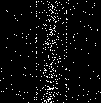

In [17]:
robots = [Robot(*t) for t in pos_vel]
img = Image.fromarray(np.zeros([maxX, maxY, 3], dtype=np.uint8))
h = display(img,display_id=True)    
#for i in range(1,125) :
for i in range(23+(101*70), 10403, 101) :
    img = robots_img(move_robots(i,robots))
    h.update(img)
    print(i,end='\r')
    time.sleep(0.5)

In [18]:
23+(101*70)

7093

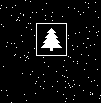

<DisplayHandle display_id=a1eed728a2dda7180c8e67ca2984a6ed>

In [15]:
img = robots_img(move_robots(7093,robots))
display(img,display_id=True)

In [19]:
M = robots_mat(move_robots(23+(101*70),robots))
sY,sX = M.sum(axis=0),M.sum(axis=1)
print(sY)
print(sX)

[ 1  3  0  2  0  0  3  2  0  0  0  3  1  0  2  2  2  1  1  1  2  1  2  2
  2  2  3  1  3  0  4  1  2  0  2  2 35  2  3  2  3  3  5  9 10 13 14 16
 19 20 24 26 27 20 18 16 14 13  8  6  4  3  4  4  4  5 35  1  5  1  2  0
  2  4  3  1  0  3  1  2  1  1  0  3  1  1  3  1  5  1  3  1  2  1  2  3
  1  3  2  1  1]
[ 1  1  2  2  0  2  0  4  2  1  0  2  4  1  2  3  2  3  0  2  3  0  0 33
  3  2  4  4  3  6  7 11 13  8  9 15 13 15 14 13 15 18 20 18 18 21 23 25
  6  6  5  2  3  2  4 34  2  4  1  1  2  2  1  2  0  0  3  0  0  2  1  2
  0  1  2  1  1  3  0  0  2  5  0  2  1  3  3  2  1  0  3  1  1  2  4  3
  0  0  2  1  1  1  1]


In [16]:
submit(7093, part="b", day=14, year=2024)

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 14! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


Opening in existing browser session.
